Name: James Wang

Course: BMGT404

Section: 0101

Date: 5/10/2024

# HW 6: Optimization, Modeling, and Prediction

In [1]:
#importing neccessary libraries needed
%matplotlib inline
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import scipy.stats as ss
from sklearn.linear_model import LinearRegression, ElasticNet, Lasso, Ridge
from sklearn.model_selection import train_test_split
from sklearn import metrics
import sqlite3
from scipy.optimize import linprog
import numpy as np

## Optimization 
To find the maximum number of each cookie to make based off constraints, optimization modeling is required.
Both cookies contain peanut butter and maple syrup, so to maxmimize revenue we need to find the optimal amount to make for each cookie without violating resource constraints. Since cookie 2 produces greater revenue, it would be optimal for more of the sugar free cookie to be produced. The objective function is to maximize profits which is 2.14x + 4.04y, but in the model it is converted to negative amounts. The decision variables of X is the regular cookie and the low-sugar cookie is Y. The constraints is the 10,000 cups of peanut butter and the 4,000 cups of maple syrup, while each regular cookie takes 0.5 cups of peanut butter and 1.25 cups of maple syrup, one low-sugar cookie requires 1.05 cups of peanut butter and 0.125 cups of maple syrup. The optimal amount came out to be 2,360 regular cookies and 8,400 low-sugar cookies and the maximum profit is $38,986.4.

In [2]:
#variables for optimization model
#coefficients for profit equation
coefficients = [-2.14,-4.04]
#coefficients for constraint equation
inequality_constraint_matrix = [[0.5, 1.05], [1.25, 0.125]]
#constraints
inequality_constraint_vector = [10000, 4000]

In [3]:
#programming result of optimization
result = linprog(coefficients, inequality_constraint_matrix, inequality_constraint_vector)
result

        message: Optimization terminated successfully. (HiGHS Status 7: Optimal)
        success: True
         status: 0
            fun: -38986.4
              x: [ 2.360e+03  8.400e+03]
            nit: 2
          lower:  residual: [ 2.360e+03  8.400e+03]
                 marginals: [ 0.000e+00  0.000e+00]
          upper:  residual: [       inf        inf]
                 marginals: [ 0.000e+00  0.000e+00]
          eqlin:  residual: []
                 marginals: []
        ineqlin:  residual: [ 0.000e+00  0.000e+00]
                 marginals: [-3.826e+00 -1.816e-01]
 mip_node_count: 0
 mip_dual_bound: 0.0
        mip_gap: 0.0

## Data Visulization of Optimation

Data visualization of the optimal production of cookies is important to understanding where the constraints may overlap and when to stop production of each cookie. This helps to maximize revenue while keeping the resources in check. 

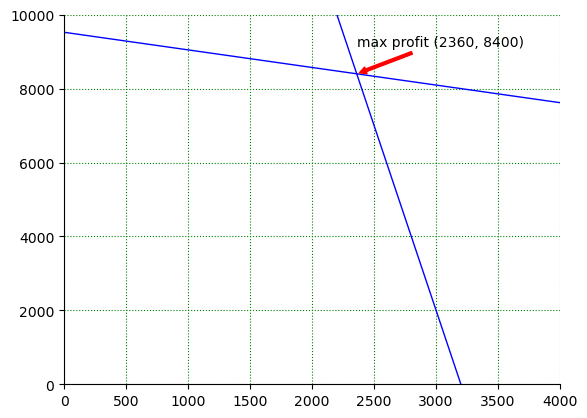

In [4]:
#Graph of optimal # of cookies to produce
fig, ax = plt.subplots()
plt.axis([0., 4000., 0., 10000.])
ax.grid(True, which='both', color='g', linestyle=':')
ax.spines['left'].set_position('zero')
ax.spines['bottom'].set_position('zero')
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')

x_vals = np.linspace(0,4000)
y1 = (10000 - (0.5*x_vals))/1.05 # From Formula 0.5x+1.05y <= 10000, solve for y
y2 = (4000 - (1.25*x_vals))/0.125 # From Formula, 1.25x + 0.125y <= 4000 solve for y

plt.plot(x_vals, y1, '-b', linewidth=1)
plt.plot(x_vals, y2, '-b', linewidth=1)

#show max profit
plt.annotate(f'max profit ({result.x[0]:.0f}, {result.x[1]:.0f})',
    xy=(result.x[0], result.x[1]),
    xytext=(result.x[0], result.x[1] + 750),
    arrowprops={"arrowstyle":"simple", "color":'r'})
plt.show()

## Modeling and Prediction

We can take past data to perform analysis and forecast for future values. In this example, we take the salaries of current years of experience and their corresponding salary to predict trends of salary based on future years of experience. First, we clean the data to help make accurate analysis of data.

In [5]:
#connecting to the data base
connection = sqlite3.connect('salary.db')
#reading the sql for analysis
df = pd.read_sql('SELECT * FROM salary', connection)
#clarifying the id field for easier data comprehension
df.set_index(['id'], inplace = True)
#print first 10 fields
df.head(10)

,years_experience,salary
id,,
1,1.1,39343
2,1.3,46205
3,1.5,37731
4,2.0,43525
5,2.2,39891
6,2.9,56642
7,3.0,60150
8,3.2,54445
9,3.2,64445


In [6]:
#converting salary to integers
df['salary'] = df['salary'].astype(int)

In [19]:
#creating linear regression equation
linear_regression = ss.linregress(x=df['years_experience'], y=df['salary'])

In [20]:
#print slope and intercept
print(f'Slope: {linear_regression.slope}')
print(f'Intercept {linear_regression.intercept}')

Slope: 9449.962321455077
Intercept 25792.20019866869


## OLS model

In this model we can verify what we calculated in the linear regression model before. Still following the same principles of adding the years of experience in the independent portion and the salary as the dependent portion, we see that the slope and the intercept are the same. The relation between these two variables is a positive one, as there is a positive slope, meaning that as one has more years of experience, it is expected that the salary continues to grow as well.

In [10]:
#forming a model with independent variables of years of experience and dependent variables of salary
X_model = df['years_experience']
Y_model = df['salary']

In [11]:
#adding constant to every variable
X_model = sm.add_constant(X_model)

In [12]:
#fitting the variables into the model and printing the summary
model = sm.OLS(Y_model, X_model)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 salary   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Fri, 10 May 2024   Prob (F-statistic):           1.14e-20
Time:                        15:06:37   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             2.579e+04   2273.053     11.347      0.000    2.11e+04    3.04e+04
years_experience  9449.9623    378.755     24.950      0.000    8674.119    1.02e+04
==============================================================================
Omnibus:                        2.140   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.569
Skew:                           0.363   Prob(JB):                        0.456
Kurtosis:                       2.147   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Data Visualization for Salary data
We can observe the observation we made earlier through this data visualization. There is a positive direct relationship between years of experience and salary. As one gets more years of experience, the Salary becomes higher.

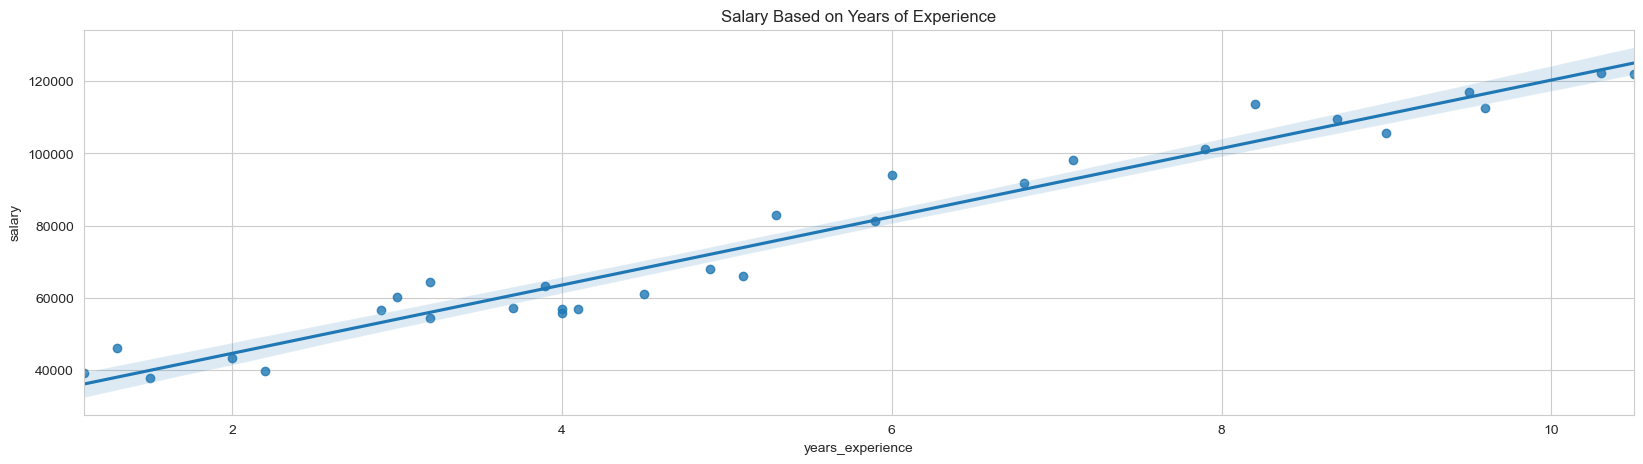

In [13]:
#plotting salary based on years of experience using seaborne
sns.set_style('whitegrid')
fig, axes = plt.subplots()
fig.set_size_inches(20, 5)
axes = sns.regplot(x=df['years_experience'], y=df['salary'])
axes.set_xlim(df['years_experience'].min(), df['years_experience'].max())
axes.set_title('Salary Based on Years of Experience');

## Model Training and Testing

To determine future outlooks using past data, we evaluate how the linear regression predicts values in the future. Since we know that with more years of experience a higher salary is expected, we can use that knowledge in testing of a model. Using metrics like r^2 test and omnibus we can test the accuracy of the model and see if there is skewing in the data and how close the relationship is between variables and their expected outcomes. The r-squared metric is close to one, revealing that that the relationship is fairly close to the line of best fit. However, there is a omnibus score of 2.14, which is somewhat high. The desired value of this test is somewhere close to 0, showing that data points in this model is not close to normalcy or the line of best fit. I believe this model is somewhat accurate in the closeness of the line of best fit, but after some testing, there are some predicted values that undershoot or overshoot the expected values. 

In [14]:
#training the model
X_train, X_test, y_train, y_test = train_test_split(df['years_experience'].values.reshape(-1, 1),
    df['salary'].values, random_state=11) 

In [15]:
#checking the split in data
print(X_train.size, 'items --', X_train.size/(X_train.size + X_test.size) * 100)
print(X_test.size, 'items --', X_test.size/(X_train.size + X_test.size) * 100)

22 items -- 73.33333333333333
8 items -- 26.666666666666668


In [22]:
#fitting the data into the linear regression
linear_regression = LinearRegression()
linear_regression.fit(X=X_train, y=y_train)

LinearRegression()

In [27]:
#check slope and intercept
print(linear_regression.coef_) 
print(linear_regression.intercept_)

[9421.69497161]
25907.980429104304


In [33]:
#testing the model and evaluating how accurate it is
expected = y_test
predicted = linear_regression.predict(X_test)
metrics.r2_score(expected, predicted)

0.9344058649705056

In [32]:
#comparing prediction to expected
for p, e in zip(predicted, expected):  # check every element
    print('Predicted: %.2f, Expected: %.2f' % (p, e))

Predicted: 72074.29, Expected: 67938.00
Predicted: 56057.40, Expected: 64445.00
Predicted: 54173.07, Expected: 60150.00
Predicted: 115414.08, Expected: 116969.00
Predicted: 44751.37, Expected: 43525.00
Predicted: 63594.76, Expected: 55794.00
Predicted: 68305.61, Expected: 61111.00
Predicted: 92802.01, Expected: 98273.00


## Predicting salary based on years of experience using machine learning

The company wants to figure out how much it would cost to hire people of varying years of experience. However, they don't have the previous data for these years of experience, so they need to forecast the values of the salaries.

In [24]:
#using potential years of experience to predict salary
hire_list = [12, 15, 17, 18, 21, 23, 26]
#create predict function
predict = lambda x: linear_regression.coef_ * x + linear_regression.intercept_
#empty list to hold predicted values for analysis
predicted = []

#printing out the years of experience and expected salary based off regression
for i in hire_list:
    print(f'The salary prediction for {i} years of experience is ${predict(i)}')
    predicted.append(predict(i)[0])

#combine dataframes to use for data visualization
predicted = pd.concat([pd.Series(hire_list), pd.Series(predicted)], axis=1)
predicted.columns = ['years_experience','salary']
combined = pd.concat([df, predicted])

The salary prediction for 12 years of experience is $[138968.32008848]
The salary prediction for 15 years of experience is $[167233.40500333]
The salary prediction for 17 years of experience is $[186076.79494655]
The salary prediction for 18 years of experience is $[195498.48991817]
The salary prediction for 21 years of experience is $[223763.57483301]
The salary prediction for 23 years of experience is $[242606.96477624]
The salary prediction for 26 years of experience is $[270872.04969109]


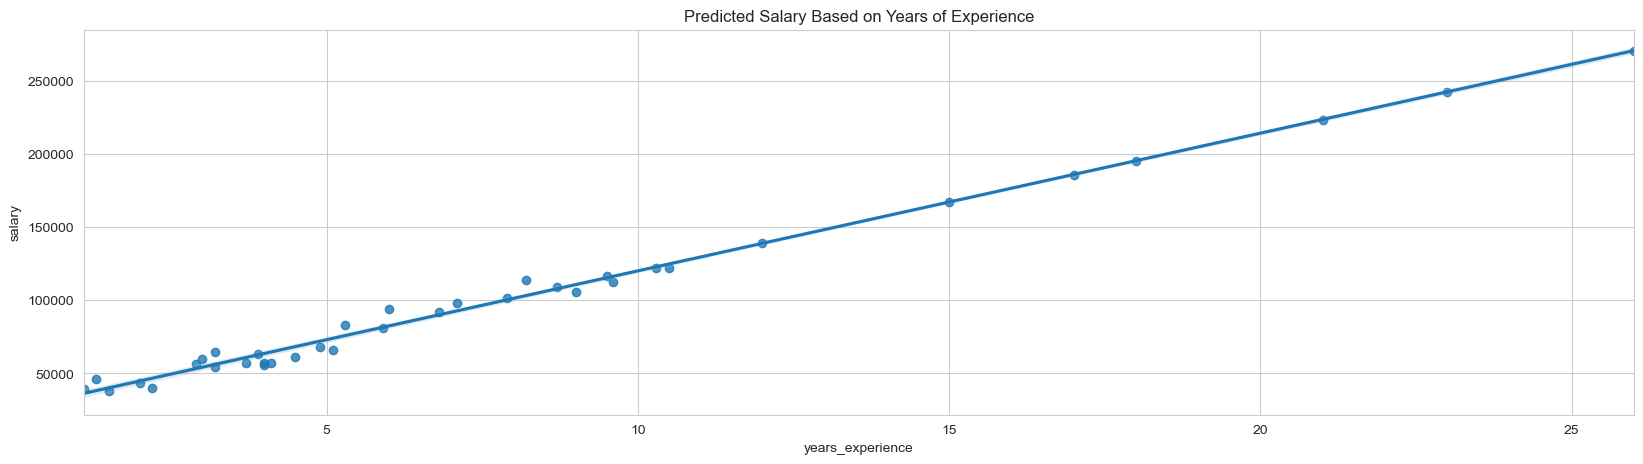

In [26]:
#creating data visualization with the original and forecasted values
sns.set_style('whitegrid')
fig, axes = plt.subplots()
fig.set_size_inches(20, 5)
axes = sns.regplot(x=combined['years_experience'], y=combined['salary'])
axes.set_xlim(combined['years_experience'].min(), combined['years_experience'].max())
axes.set_title('Predicted Salary Based on Years of Experience');

In [34]:
connection.close()

"I pledge on my honor that I have not given nor received any unauthorized assistance on this assignment."

--James Wang